<ipython-input-2-4f3ee9a36fbf>:55: UserWarning: The following kwargs were not used by contour: 'label', 'fontsize'
  plt.contour(mu_fine,phi_fine, f_fine, levels=[0], colors='royalblue', linewidths=2, label='f=0', fontsize=10)
<ipython-input-2-4f3ee9a36fbf>:56: UserWarning: The following kwargs were not used by contour: 'label', 'fontsize'
  plt.contour(mu_fine,phi_fine, g_fine, levels=[0], colors='palevioletred', linewidths=2, label='g=0', fontsize=10)


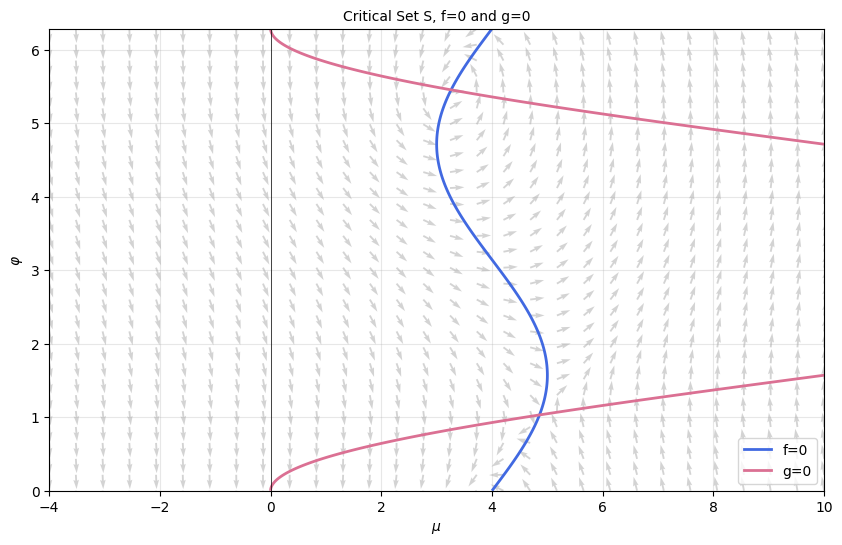

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot

#Set of parameters
eta=10
alpha=np.pi/2
omega=-4
epsilon=0.1


def f(mu, phi):
    """
    This is a function corresponding to the derivative with respect to the fast time t of phi, the phase of the neuron.
    Vars:
        mu: float
        phi: float
    """
    return omega+mu-np.sin(phi)

def g(mu, phi):
    """
    This is a function corresponding to the derivative with respect to the fast time t of mu, which is a slowly varying adaptive input
    Vars:
        mu: float
        phi: float
    """
    return epsilon*(-mu+eta*(1-np.sin(phi+alpha)))

mu_vals=np.linspace(-4, 10, 30) #Here we are creating 30 evenly spaced values for mu in between -2 and 2
phi_vals=np.linspace(0, 2*np.pi, 30) #Here we are creating 30 evenly spaced values for phi in between 0 and 2*pi
phi, mu=np.meshgrid(phi_vals, mu_vals) #Here we are creating a grid of phi and mu values in order to visualize the system in 2D
f_vals=f(mu, phi) #f for all combinations of mu and phi in the grid
g_vals=g(mu, phi) #g for all combinations of mu and phi in the grid

#Normalization
magnitude=np.sqrt(f_vals**2+g_vals**2)
f_vals_normalized=f_vals/magnitude
g_vals_normalized=g_vals/magnitude

#Grid for the contour plot
mu_fine=np.linspace(-4, 10, 500)
phi_fine=np.linspace(0, 2*np.pi, 500)
mu_fine,phi_fine=np.meshgrid(mu_fine, phi_fine)
f_fine= f(mu_fine, phi_fine)
g_fine= g(mu_fine, phi_fine)


f_proxy = plt.Line2D([0], [0], color='royalblue', linewidth=2)
g_proxy = plt.Line2D([0], [0], color='palevioletred', linewidth=2)

#Plotting graph
plt.figure(figsize=(10, 6))
plt.contour(mu_fine,phi_fine, f_fine, levels=[0], colors='royalblue', linewidths=2, label='f=0', fontsize=10)
plt.contour(mu_fine,phi_fine, g_fine, levels=[0], colors='palevioletred', linewidths=2, label='g=0', fontsize=10)
plt.quiver( mu, phi, g_vals_normalized, f_vals_normalized, color='darkgrey', alpha=0.5)
plt.title('Critical Set S, f=0 and g=0', fontsize=10)
plt.xlabel(r'$\mu$', fontsize=10)
plt.ylabel(r'$\varphi$', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(alpha=0.3)

plt.legend([f_proxy, g_proxy], ['f=0', 'g=0'], loc='lower right', fontsize=10)

plt.show()
